Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset

In [3]:
names = ['VENDOR','MODEL_NAME','MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP' ]
data = pd.read_csv('data/machine.data',names=names)
print(data.head())

    VENDOR MODEL_NAME  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  adviser      32/60   125   256   6000   256     16    128  198  199
1   amdahl     470v/7    29  8000  32000    32      8     32  269  253
2   amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3   amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4   amdahl    470v/7c    29  8000  16000    32      8     16  132  132


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
VENDOR        209 non-null object
MODEL_NAME    209 non-null object
MYCT          209 non-null int64
MMIN          209 non-null int64
MMAX          209 non-null int64
CACH          209 non-null int64
CHMIN         209 non-null int64
CHMAX         209 non-null int64
PRP           209 non-null int64
ERP           209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB
None


In [5]:
#categorical = data.iloc[:,:2]
numerical = data.iloc[:,2:]
print(numerical.head())

   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0   125   256   6000   256     16    128  198  199
1    29  8000  32000    32      8     32  269  253
2    29  8000  32000    32      8     32  220  253
3    29  8000  32000    32      8     32  172  253
4    29  8000  16000    32      8     16  132  132


In [6]:
X = numerical.iloc[:,:-1]
y = numerical.iloc[:,-1]

print(X.head())



   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0   125   256   6000   256     16    128  198
1    29  8000  32000    32      8     32  269
2    29  8000  32000    32      8     32  220
3    29  8000  32000    32      8     32  172
4    29  8000  16000    32      8     16  132


print(y.head())

Train/Test split

In [9]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

Data Preprocessing

In [11]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_training_set)

# Apply transform to both the training set and the test set.
x_training_set = scaler.transform(x_training_set)
x_test_set = scaler.transform(x_test_set)

Fit the model

In [13]:
model = linear_model.LinearRegression()
model.fit(x_training_set,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Evaluate model

In [14]:
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("Coefficient of determination R^2 of the prediction:{:.2f}".format(model_score))
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))


Coefficient of determination R^2 of the prediction:0.96
Mean squared error: 6102.81
Test Variance score: 0.93


Visualize goodness of fit

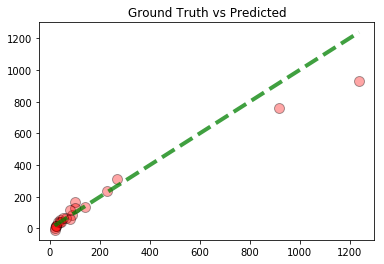

In [15]:
plt.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0), color = 'red', alpha = 0.35, s = 100)
plt.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4, color = 'green', alpha = 0.75)
plt.title("Ground Truth vs Predicted")
plt.show()